# Understanding and Exploring World Happiness Data through Data Visualization and Analysis

In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import pycountry
import plotly.graph_objects as go
import seaborn as sns
import numpy as np

## Step 1 : Data Collection
Data from 2015-2017 were downloaded from Kaggle Dataset

In [3]:
data_2017= pd.read_csv('2017.csv',sep=',')
data_2016= pd.read_csv('2016.csv',sep=',')
data_2015= pd.read_csv('2015.csv',sep=',')

In [4]:
data_2017.head(1)

Country  Happiness.Rank  Happiness.Score  Whisker.high  Whisker.low  \
0  Norway               1            7.537      7.594445     7.479556   

   Economy..GDP.per.Capita.    Family  Health..Life.Expectancy.   Freedom  \
0                  1.616463  1.533524                  0.796667  0.635423   

   Generosity  Trust..Government.Corruption.  Dystopia.Residual  
0    0.362012                       0.315964           2.277027

In [5]:
data_2016.head(1)

Country          Region  Happiness Rank  Happiness Score  \
0  Denmark  Western Europe               1            7.526   

   Lower Confidence Interval  Upper Confidence Interval  \
0                       7.46                      7.592   

   Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
0                   1.44178  1.16374                   0.79504  0.57941   

   Trust (Government Corruption)  Generosity  Dystopia Residual  
0                        0.44453     0.36171            2.73939

In [6]:
data_2015.head(1)

Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe               1            7.587   

   Standard Error  Economy (GDP per Capita)   Family  \
0         0.03411                   1.39651  1.34951   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                   0.94143  0.66557                        0.41978   

   Generosity  Dystopia Residual  
0     0.29678            2.51738

We are going to have to rename columns for 2017, 2016, and 2015 so they are all having the same naming standard, also we are going to drop unnecessary columns as well as joining the region columns from 2016 data for 2017 data.

## Step 2 : Data Cleaning

In [7]:
#Cleaning up for 2017
cols_to_drop = ['Whisker.high','Whisker.low']
data_2017_tidy=data_2017.drop(cols_to_drop, axis=1)
data_2017_tidy.columns=['Country','Happiness_Rank', 'Happiness_Score','GDP_per_Capita',
                        'Social_Support','Life_Expectancy','Freedom','Generosity','Government_Trust','Dystopia_Residual']

#Cleaning up for 2016
cols_to_drop_2016 = ['Lower Confidence Interval','Upper Confidence Interval']
data_2016_tidy=data_2016.drop(cols_to_drop_2016, axis=1)
data_2016_tidy.columns=['Country','Region', 'Happiness_Rank', 'Happiness_Score','GDP_per_Capita',
                        'Social_Support','Life_Expectancy','Freedom','Generosity','Government_Trust','Dystopia_Residual']
#Cleaning up for 2016
cols_to_drop_2015 = ['Standard Error']
data_2015_tidy=data_2015.drop(cols_to_drop_2015, axis=1)
data_2015_tidy.columns=['Country','Region', 'Happiness_Rank', 'Happiness_Score','GDP_per_Capita',
                        'Social_Support','Life_Expectancy','Freedom','Generosity','Government_Trust','Dystopia_Residual']

#joining 2016 data to get region for 2017 data

data_2017_tidy=pd.merge(data_2017_tidy, data_2016_tidy[['Country','Region']], on='Country', how='left')
data_2017_tidy=data_2017_tidy[['Country','Region', 'Happiness_Rank', 'Happiness_Score','GDP_per_Capita',
                        'Social_Support','Life_Expectancy','Freedom','Generosity','Government_Trust','Dystopia_Residual']]


In [8]:
data_2017_tidy.describe()

Happiness_Rank  Happiness_Score  GDP_per_Capita  Social_Support  \
count      155.000000       155.000000      155.000000      155.000000   
mean        78.000000         5.354019        0.984718        1.188898   
std         44.888751         1.131230        0.420793        0.287263   
min          1.000000         2.693000        0.000000        0.000000   
25%         39.500000         4.505500        0.663371        1.042635   
50%         78.000000         5.279000        1.064578        1.253918   
75%        116.500000         6.101500        1.318027        1.414316   
max        155.000000         7.537000        1.870766        1.610574   

       Life_Expectancy     Freedom  Generosity  Government_Trust  \
count       155.000000  155.000000  155.000000        155.000000   
mean          0.551341    0.408786    0.246883          0.123120   
std           0.237073    0.149997    0.134780          0.101661   
min           0.000000    0.000000    0.000000          0.000000   
25%           0.369866    0.303677    0.154106          0.057271   
50%           0.606042    0.437454    0.231538          0.089848   
75%           0.723008    0.516561    0.323762          0.153296   
max           0.949492    0.658249    0.838075          0.464308   

       Dystopia_Residual  
count         155.000000  
mean            1.850238  
std             0.500028  
min             0.377914  
25%             1.591291  
50%             1.832910  
75%             2.144654  
max             3.117485

Checking 0 value to see if it is bad data

In [9]:
data_2017_tidy.loc[(data_2017_tidy.GDP_per_Capita==0) | (data_2017_tidy.Social_Support==0)| (data_2017_tidy.Life_Expectancy==0) 
| (data_2017_tidy.Freedom==0)| (data_2017_tidy.Generosity==0) | (data_2017_tidy.Government_Trust==0)]


Country                      Region  Happiness_Rank  \
86                     Greece              Western Europe              87   
89     Bosnia and Herzegovina  Central and Eastern Europe              90   
138                   Lesotho                         NaN             139   
139                    Angola          Sub-Saharan Africa             140   
154  Central African Republic                         NaN             155   

     Happiness_Score  GDP_per_Capita  Social_Support  Life_Expectancy  \
86             5.227        1.289487        1.239415         0.810199   
89             5.182        0.982409        1.069336         0.705186   
138            3.808        0.521021        1.190095         0.000000   
139            3.795        0.858428        1.104412         0.049869   
154            2.693        0.000000        0.000000         0.018773   

      Freedom  Generosity  Government_Trust  Dystopia_Residual  
86   0.095731    0.000000          0.043290           1.749222  
89   0.204403    0.328867          0.000000           1.892173  
138  0.390661    0.157497          0.119095           1.429835  
139  0.000000    0.097926          0.069720           1.614482  
154  0.270842    0.280876          0.056565           2.066005

Does not look like data were bad since the 0 only exist in one factor but not the others.
We did see a Nan value in Region due to the join. Let's count them to see how big of an issue it is.

In [10]:
data_2017_tidy['Region'].isna().sum()

5

It is about 5, not a big deal, we can go back and add that data if we decide to use region. 

## Step 3 : Visualization Methods Brainstorming

See project report for strategy discussion

## Step 4: Experiments and Analysis



### Pie Chart



We want to find the proportion of all factors and compare them to each other. Since all of them will add up to 100%, pie chart is a good candidate to find the percentage of each factor. Something to keep in mind is to see if the categories are too many, do we need legend or can we just make text big enough, and maybe we will have to use qualitative colormap like paired. 

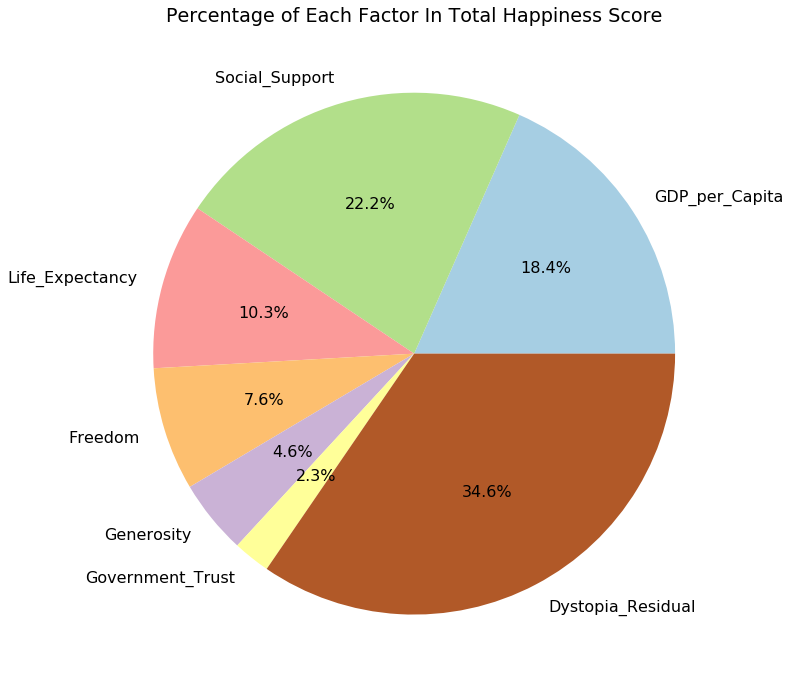

In [13]:
sum_2017=pd.DataFrame(data_2017_tidy.iloc[:,4:11].sum())
sum_2017.plot.pie(subplots=True, figsize=(15,12),autopct='%1.1f%%', legend=False, cmap='Paired')
plt.title('Percentage of Each Factor In Total Happiness Score')
plt.ylabel('')
plt.rcParams['font.size'] = 16.0

The font size are not bad, the visualization is not too crowded with categories, color are different enough. I was debating between whether to have legend but I think we don't have too many categories, we can just add labels on the graph and ignore the legend. Also, the actual number is important so I decided to show the value as well. As we can see, besides Dystopia Residual, Social Support is actually the bigger components of the whole world's happiness score. GDP per capita is also large but it not as big as Social Support. Now we can confirm the guess we got from the World Happiness Report 2nd graph that was mentioned in the report.

### Heatmap

Now, let's see what the relationship of each individual factor is to the happiness score and to each other. We want to find some visualization that can show matrix information because we have like 8 pairs of relationship we want to compare. Heatmap would be useful but we need to be careful to ensure we use the right colormap because our data will be a continuous number from -1 to 1.

Text(0.5, 0.98, 'Correlation Coefficient Matrix')

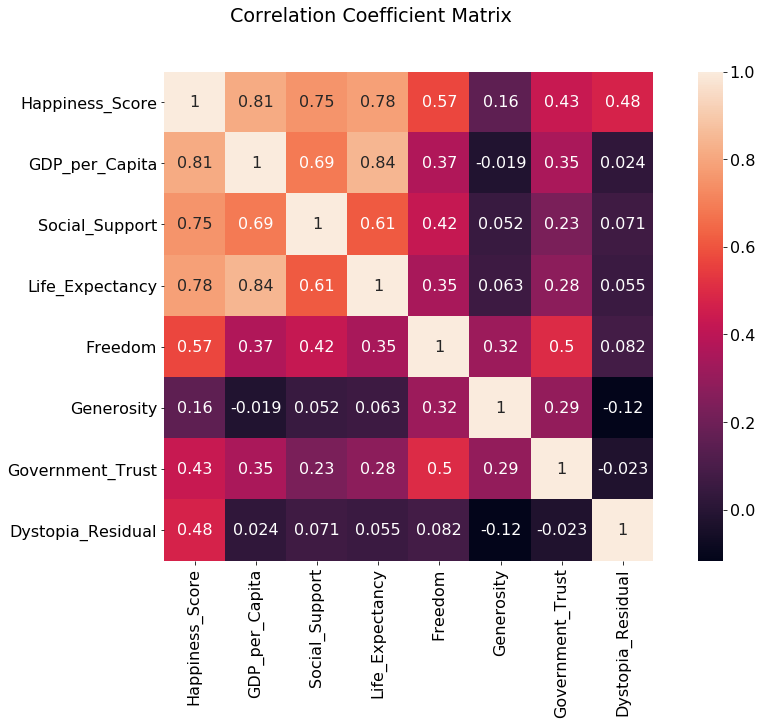

In [12]:
corr= data_2017_tidy.iloc[:,3:11].corr()


plt.subplots(figsize=(16, 9))

sns.heatmap(corr, square=True, annot=True)
plt.suptitle('Correlation Coefficient Matrix')


The top right half of the heatmap is a repetitive of the bottom half of the heatmap. The lighter the color, the higher the relationships.

GDP per capita, social support, and life expectancy are the three factors that have the highest relationship to the overall happiness score. Eventhough Dystopia Residual has the largest proportion from the pie chart above, it does not seem to be as effective as the other three factors in predicting happiness scores.
GDP per Capita, social support and life expectancy also have high correlation with each other, surprisingly.
There are also a correlation between government trust and freedom.


### Map
Since we are interesting about whether there is an area and which countries that have the highest changes in happiness score, a map would be useful to show our geographical data. However, a map with country names as label can be crowded so I decided to look into an interactive map options. Also, the map will be showing the value of changes in happiness score so we will have to choose a color map that show continuous data. So let's choose 'Viridis' and see how it works.

But before that, we will have to calculate the changes between 2015 and 2017 and drop countries that don't have data in either 2015 or 2017. Also, the changes might be small decimal data so we will have to reformat it. 

And in order for map to work with plotly, we will have to use pycountry to get the list of iso alpha 3 acronyms of country names.

In [136]:
#iso_alpha3={x.alpha_2: country_name_format(x.name, COUNTRY_NAME_FORMAT_DEFAULT) for x in pycountry.countries}

list(pycountry.countries)[0]
list_alpha_3=[[i.name, i.alpha_3]  for i in list(pycountry.countries)]
df_alpha_3=pd.DataFrame(list_alpha_3, columns=['Country', 'ISO3'])
df_alpha_3

iso_data_2017=pd.merge(data_2017_tidy, df_alpha_3, on='Country', how='left')


iso_data_2016=pd.merge(data_2016_tidy, df_alpha_3, on='Country', how='left')

iso_data_2015=pd.merge(data_2015_tidy, df_alpha_3, on='Country', how='left')

iso_data_2017=pd.merge(iso_data_2017, iso_data_2015[['Country', 'Happiness_Score']], on='Country', how='left')
iso_data_2017
iso_data_2017['Change_in_Happiness_Score']=iso_data_2017['Happiness_Score_x']  - iso_data_2017['Happiness_Score_y']
make_float = lambda x: "{:,.5f}".format(x)
iso_data_2017['Change_in_Happiness_Score']=iso_data_2017['Change_in_Happiness_Score'].apply(make_float)
iso_data_2017


iso_data_2017.drop( iso_data_2017[ iso_data_2017['Change_in_Happiness_Score'] == 'nan' ].index , inplace=True)
iso_data_2017

Country                           Region  \
0                      Norway                   Western Europe   
1                     Denmark                   Western Europe   
2                     Iceland                   Western Europe   
3                 Switzerland                   Western Europe   
4                     Finland                   Western Europe   
5                 Netherlands                   Western Europe   
6                      Canada                    North America   
7                 New Zealand        Australia and New Zealand   
8                      Sweden                   Western Europe   
9                   Australia        Australia and New Zealand   
10                     Israel  Middle East and Northern Africa   
11                 Costa Rica      Latin America and Caribbean   
12                    Austria                   Western Europe   
13              United States                    North America   
14                    Ireland                   Western Europe   
15                    Germany                   Western Europe   
16                    Belgium                   Western Europe   
17                 Luxembourg                   Western Europe   
18             United Kingdom                   Western Europe   
19                      Chile      Latin America and Caribbean   
20       United Arab Emirates  Middle East and Northern Africa   
21                     Brazil      Latin America and Caribbean   
22             Czech Republic       Central and Eastern Europe   
23                  Argentina      Latin America and Caribbean   
24                     Mexico      Latin America and Caribbean   
25                  Singapore                Southeastern Asia   
26                      Malta                   Western Europe   
27                    Uruguay      Latin America and Caribbean   
28                  Guatemala      Latin America and Caribbean   
29                     Panama      Latin America and Caribbean   
..                        ...                              ...   
124                   Georgia       Central and Eastern Europe   
125          Congo (Kinshasa)               Sub-Saharan Africa   
126                      Mali               Sub-Saharan Africa   
127               Ivory Coast               Sub-Saharan Africa   
128                  Cambodia                Southeastern Asia   
129                     Sudan               Sub-Saharan Africa   
130                     Ghana               Sub-Saharan Africa   
131                   Ukraine       Central and Eastern Europe   
132                    Uganda               Sub-Saharan Africa   
133              Burkina Faso               Sub-Saharan Africa   
134                     Niger               Sub-Saharan Africa   
135                    Malawi               Sub-Saharan Africa   
136                      Chad               Sub-Saharan Africa   
137                  Zimbabwe               Sub-Saharan Africa   
138                   Lesotho                              NaN   
139                    Angola               Sub-Saharan Africa   
140               Afghanistan                    Southern Asia   
141                  Botswana               Sub-Saharan Africa   
142                     Benin               Sub-Saharan Africa   
143                Madagascar               Sub-Saharan Africa   
144                     Haiti      Latin America and Caribbean   
145                     Yemen  Middle East and Northern Africa   
147                   Liberia               Sub-Saharan Africa   
148                    Guinea               Sub-Saharan Africa   
149                      Togo               Sub-Saharan Africa   
150                    Rwanda               Sub-Saharan Africa   
151                     Syria  Middle East and Northern Africa   
152                  Tanzania               Sub-Saharan Africa   
153                   Burundi               Sub-Saharan Africa

In [17]:

fig = go.Figure(data=go.Choropleth(
    locations=iso_data_2017["ISO3"],
    z=iso_data_2017["Change_in_Happiness_Score"], # lifeExp is a column of gapminder
    #visible=True,
    colorscale='Viridis',
    text= 'Country Name: ' + iso_data_2017['Country']
))
fig.update_layout(title=go.layout.Title(text="Happiness Score Changes from 2015 to 2017"))
fig.show()


The interactive is great, color scheme is also great to show the value scale. We can kind of see the right side of the map has lighter color, and especially the middle part of the name. It seems like the area that have some good improvement but it is not too obvious since there are some mix with dark colors as well. This world map failed to help us identify which countries are the most improved countries though; I can see the yellow but it is really hard to find out which one is the top. So let's sort the data and graph a bar chart to see the ranking.

Text(0.5, 0, 'Change in Happiness Score')

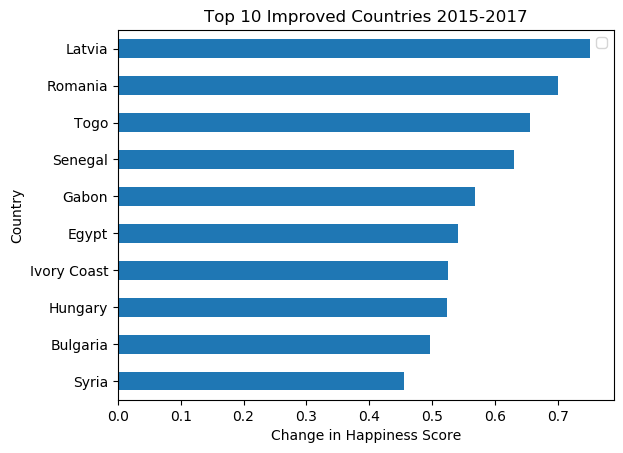

In [154]:
rank_2017=iso_data_2017[['Country','Change_in_Happiness_Score']]
rank_2017=rank_2017.sort_values(by=['Change_in_Happiness_Score'], ascending =False)
rank_2017=rank_2017.iloc[0:10]

rank_2017

ax.barh(rank_2017['Country'], rank_2017['Change_in_Happiness_Score'])

rank_2017['Change_in_Happiness_Score']=rank_2017['Change_in_Happiness_Score'].astype(np.float16)
rank_2017=rank_2017.iloc[::-1]
rank_2017.plot.barh(y='Change_in_Happiness_Score', x='Country')
plt.legend('')
plt.title('Top 10 Improved Countries 2015-2017')
plt.xlabel('Change in Happiness Score')


Here we can find the most improved country are Latvia and how it is comparing to the other top countries. We could also use a table to show the actual value if we want to just get the actual value, it is also quite tricky to get the label to show in bar chart.



In [155]:
rank_2017.iloc[::-1]

Country  Change_in_Happiness_Score
53        Latvia                   0.751953
56       Romania                   0.701172
149         Togo                   0.655762
114      Senegal                   0.630859
117        Gabon                   0.568848
103        Egypt                   0.541016
127  Ivory Coast                   0.524902
74       Hungary                   0.523926
104     Bulgaria                   0.496094
151        Syria                   0.456055

In [156]:
#### Deep dive on Latvia

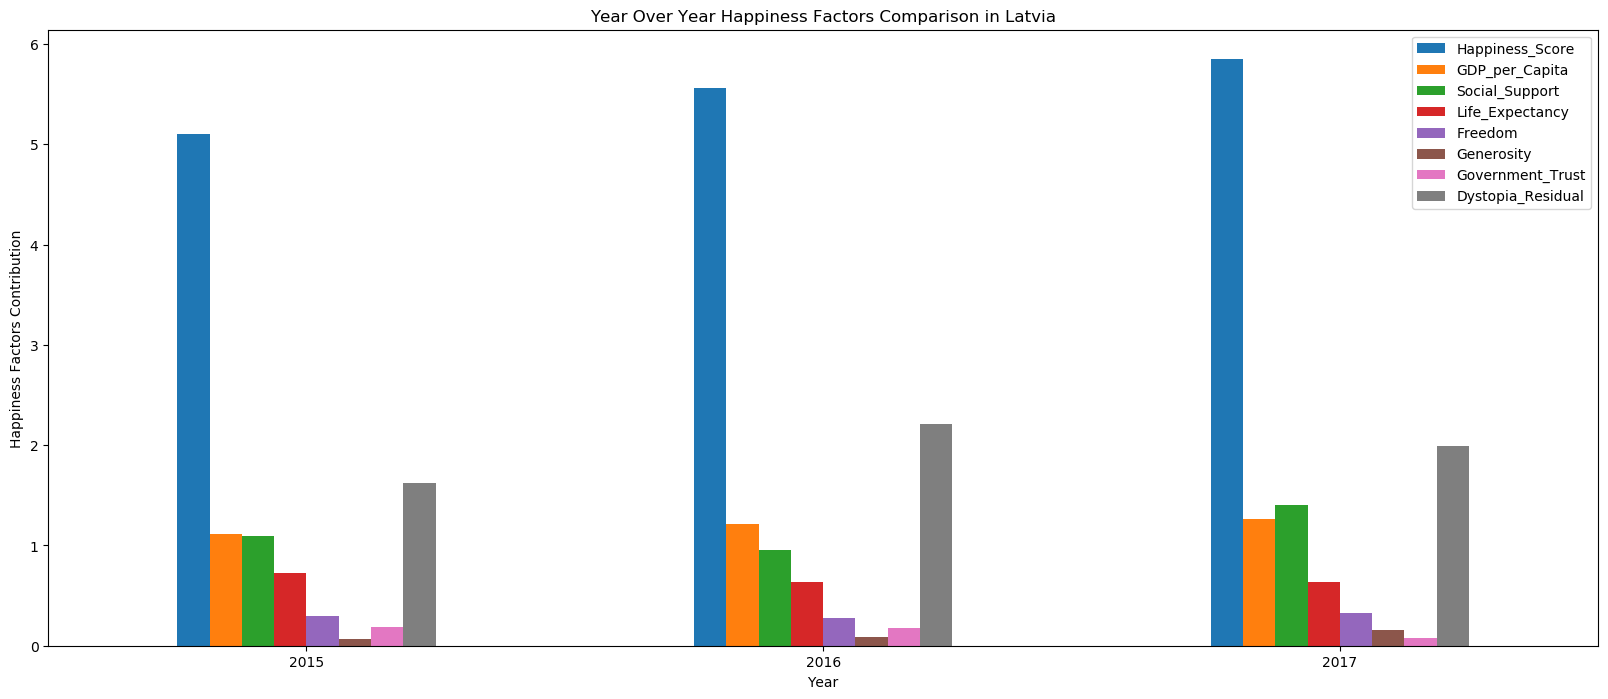

In [157]:
data_2017_tidy['Year']='2017'
data_2016_tidy['Year']='2016'
data_2015_tidy['Year']='2015'

df_Latvia=data_2015_tidy.loc[ (data_2015_tidy['Country'] == 'Latvia') ]

df_Latvia=df_Latvia.append(data_2016_tidy.loc[ (data_2016_tidy['Country'] == 'Latvia') ])
df_Latvia=df_Latvia.append(data_2017_tidy.loc[ (data_2017_tidy['Country'] == 'Latvia') ])
df_Latvia.iloc[:,3:12]
ax = df_Latvia.iloc[:,3:12].plot.bar(x='Year', rot=0,figsize=(20, 8))
plt.title('Year Over Year Happiness Factors Comparison in Latvia')
plt.ylabel('Happiness Factors Contribution')
plt.legend(loc=0)


Failed experiment, the bar chart above does not seem to be able to compare each values correctly. 

In [158]:
df_numeric_data_Latvia= df_Latvia.iloc[:,3:11]
df_numeric_data_Latvia.iloc[1]
df_numeric_data_Latvia_diff=df_numeric_data_Latvia.iloc[2].subtract(df_numeric_data_Latvia.iloc[0]) 
#df_numeric_data_Latvia_diff = df_numeric_data_Latvia[2] - df_numeric_data_Latvia[0]


([<matplotlib.axis.YTick at 0x1c1dd044438>,
 <a list of 6 Text yticklabel objects>)

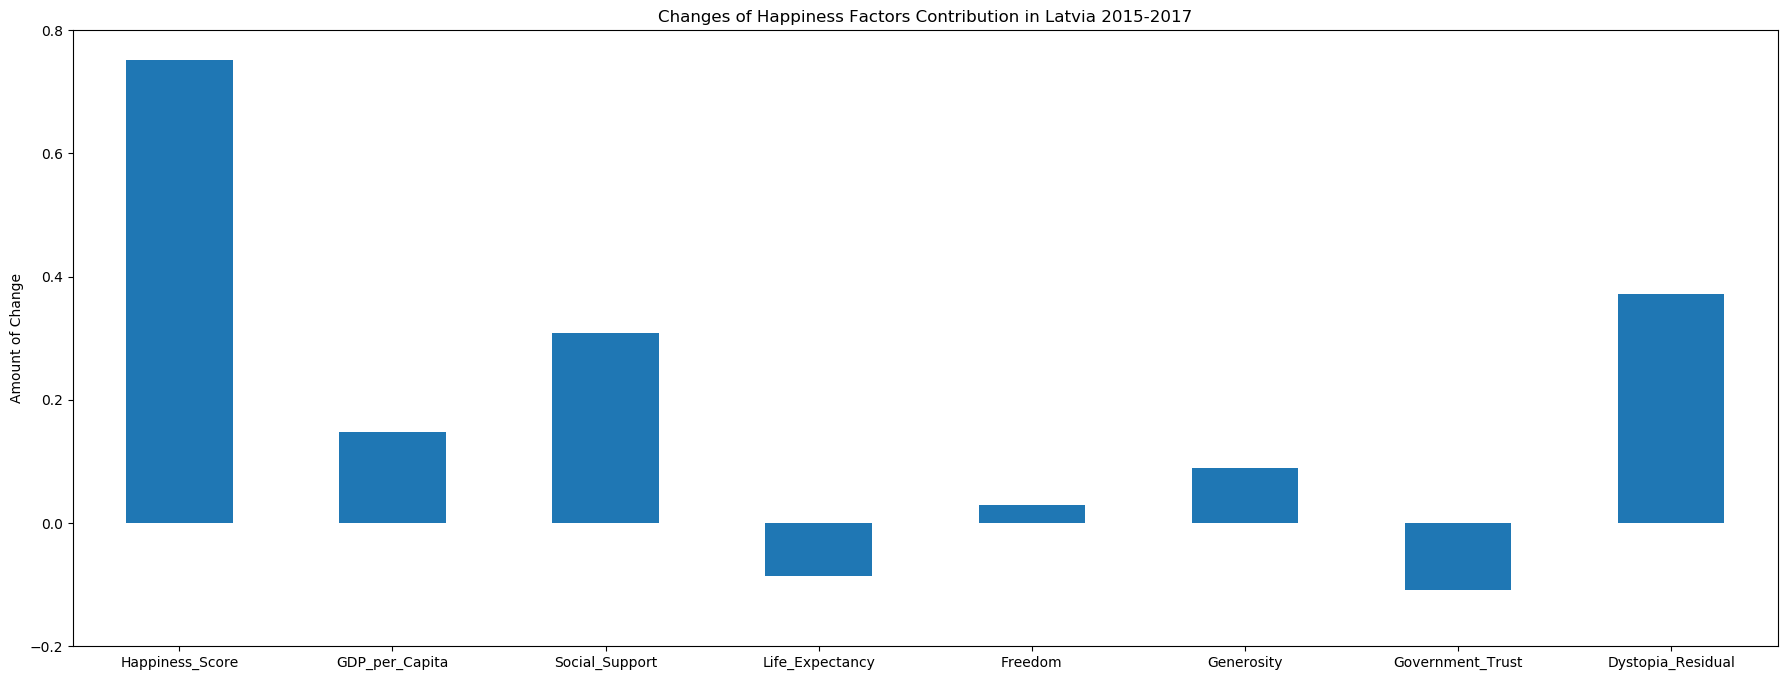

In [159]:
ax = df_numeric_data_Latvia_diff.plot.bar( rot=0,figsize=(22, 8))
plt.title('Changes of Happiness Factors Contribution in Latvia 2015-2017')
plt.ylabel('Amount of Change')
plt.ylim(-0.12,0.8)
plt.yticks([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8])


In [160]:
df_numeric_data_Latvia_diff

Happiness_Score      0.752000
GDP_per_Capita       0.147629
Social_Support       0.309095
Life_Expectancy     -0.085803
Freedom              0.028998
Generosity           0.089755
Government_Trust    -0.108417
Dystopia_Residual    0.371505
dtype: float64

### Quick overview of distribution using Histogram

Text(0.5, 0.98, 'Histogram of Happiness Score and All Factors')

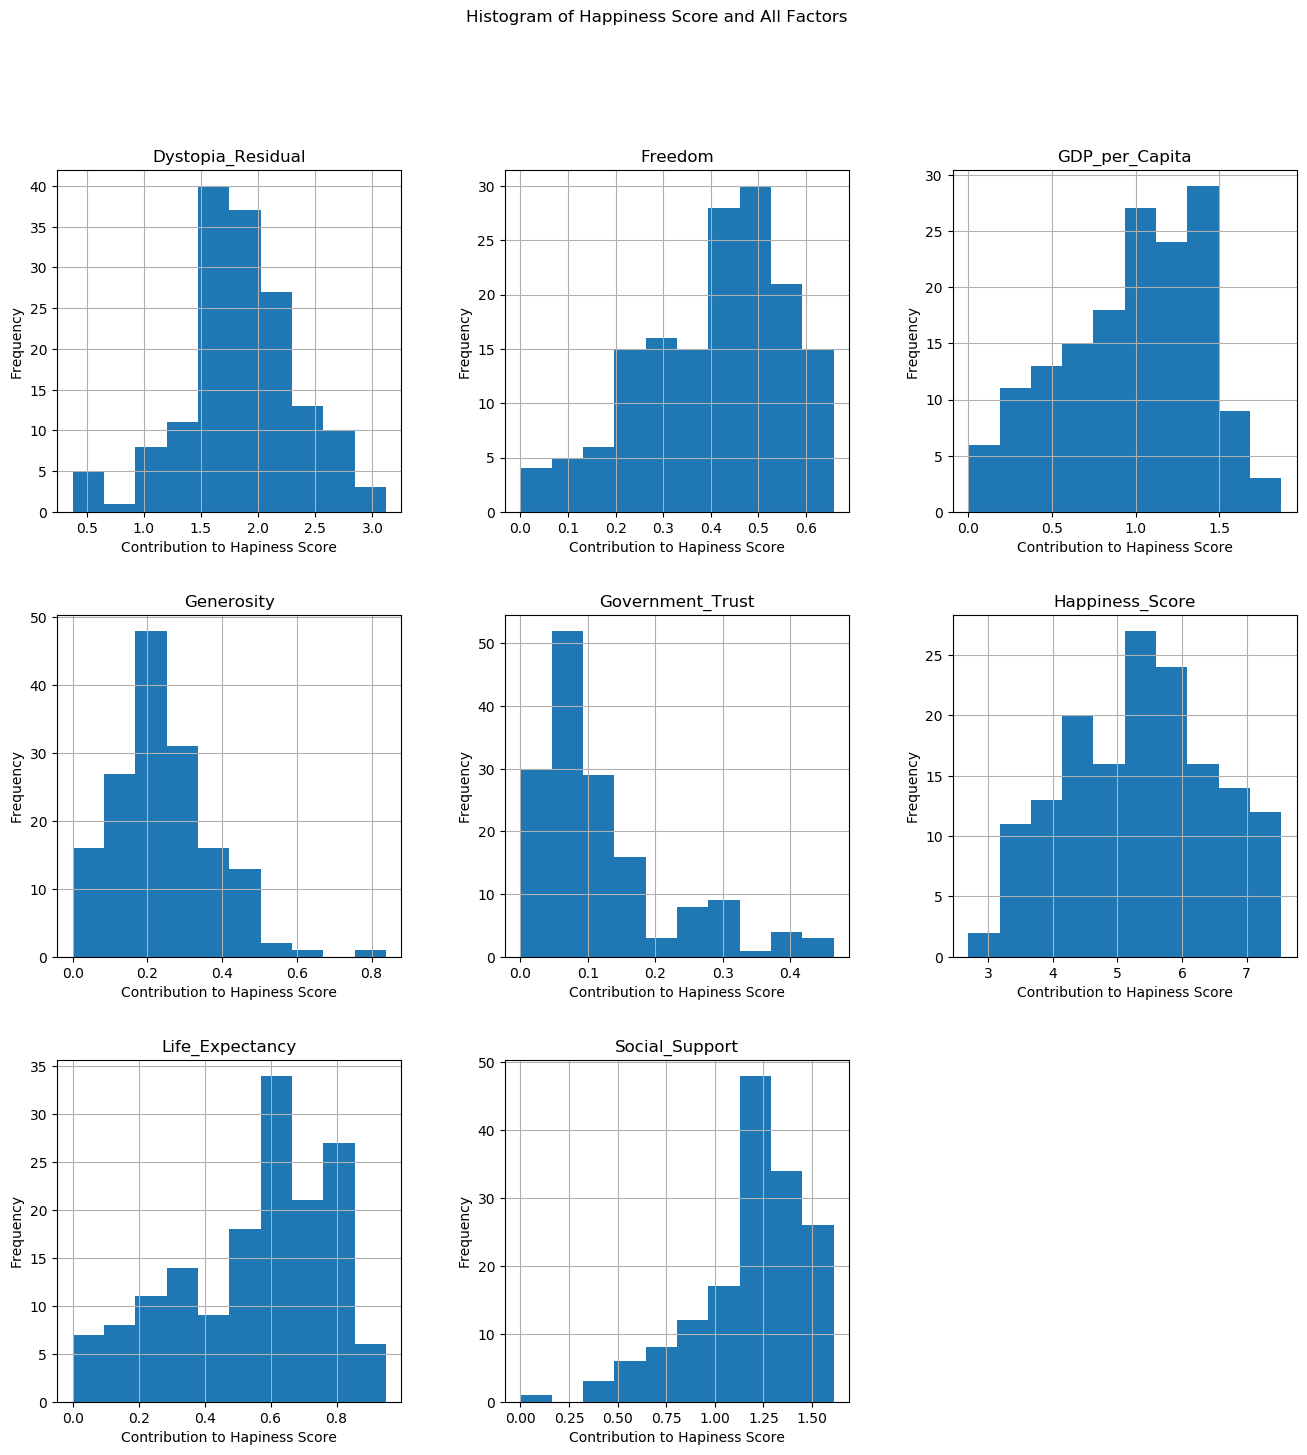

In [161]:

axarr= data_2017_tidy.iloc[:,3:11].hist(figsize=(16, 16))

for ax in axarr.flatten():
    ax.set_xlabel("Contribution to Hapiness Score")
    ax.set_ylabel("Frequency")
    
    
plt.suptitle("Histogram of Happiness Score and All Factors")


Findings:
- Countries are more likely to have low Generosity contribution and Goverment Trust Contribution
- Happiness Score has a normal distribution
- There are a lot of countries that have high social support. 



### Boxplot
Since we are trying to find outliers and find more insights, one of the useful method to identify outliers are boxplot, so let's try it out

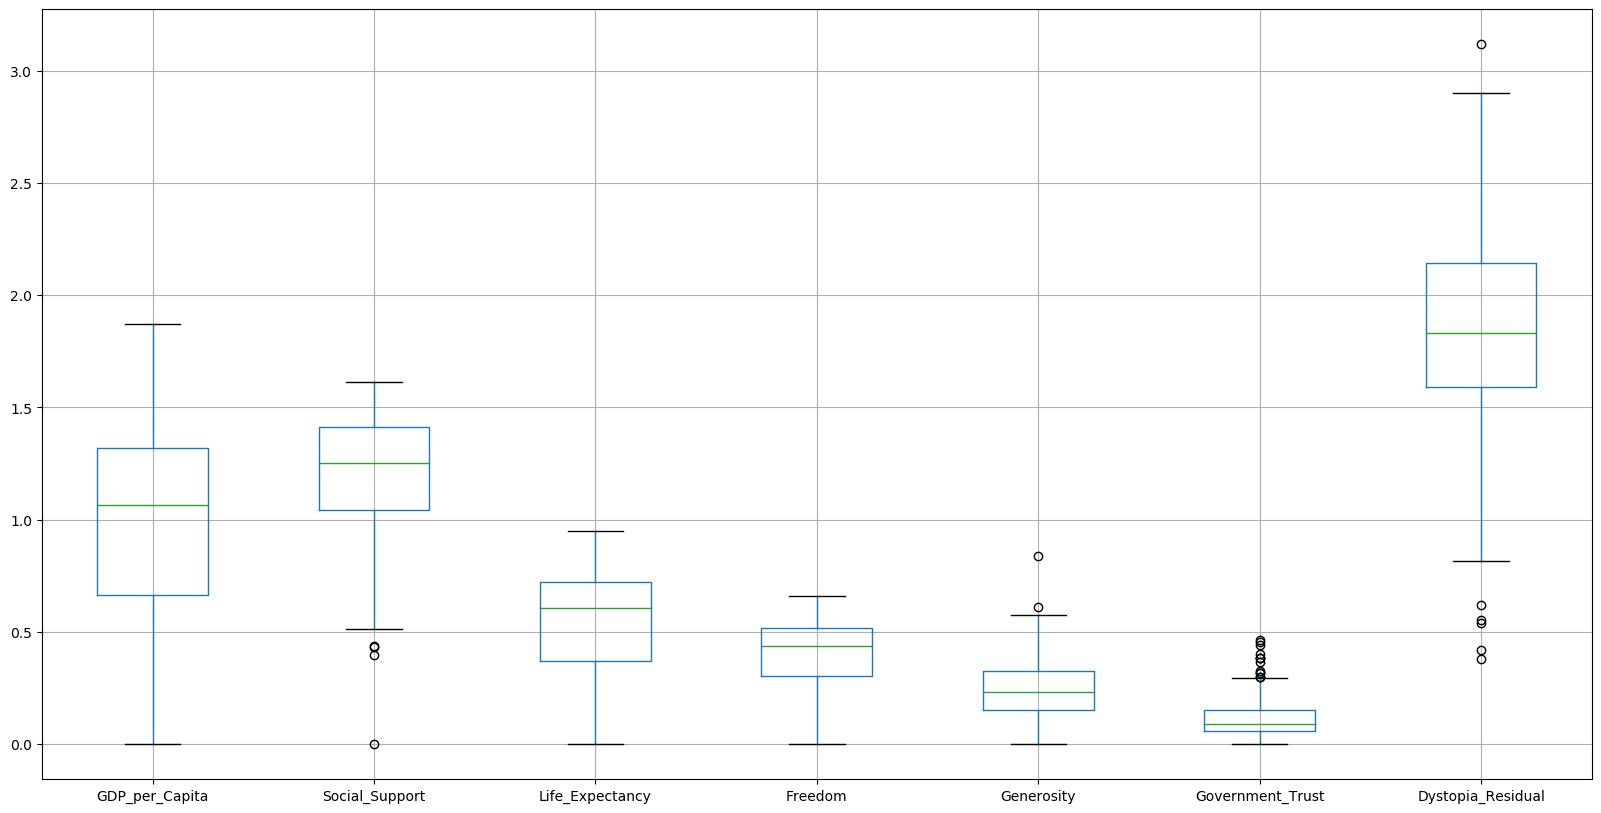

In [164]:
data_2017_tidy.iloc[:,4:11].boxplot(figsize=(20,10))

Yes we are able to find the outliers but it is tricky to get the country names from those points. I think we will have to use an interactive boxplot to show the country name when we hover over to easily identify them. 

Using Plotly to create an interactive Boxplot to compare the distribution and identify outliers, another key part is getting the correct color for each category because some of the plotly color are not what it should be. For example, brown looks quite similar to red.

In [165]:


fig = go.Figure()
fig.add_trace(go.Box(y=data_2017_tidy['GDP_per_Capita'], name='Economy (GDP per capita)',
                marker_color = 'red', text= 'Country Name: ' + data_2017_tidy['Country']))
fig.add_trace(go.Box(y=data_2017_tidy['Social_Support'], name='Social Support',
                marker_color = 'blue', text= 'Country Name: ' + data_2017_tidy['Country']))
fig.add_trace(go.Box(y=data_2017_tidy['Life_Expectancy'], name='Life Expectancy',
                marker_color = 'green', text= 'Country Name: ' + data_2017_tidy['Country']))
fig.add_trace(go.Box(y=data_2017_tidy['Freedom'], name='Freedom',
                marker_color = 'purple',text= 'Country Name: ' + data_2017_tidy['Country']))
fig.add_trace(go.Box(y=data_2017_tidy['Generosity'], name='Generosity',
                marker_color = 'orange',text= 'Country Name: ' + data_2017_tidy['Country']))
fig.add_trace(go.Box(y=data_2017_tidy['Government_Trust'], name='Government Trust',
                marker_color = 'teal',text= 'Country Name: ' + data_2017_tidy['Country']))
fig.add_trace(go.Box(y=data_2017_tidy['Dystopia_Residual'], name='Dystopia Residual',
                marker_color = 'slategrey',text= 'Country Name: ' + data_2017_tidy['Country']))
fig.update_layout(title=go.layout.Title(text="2017 Happiness Score Contribution Comparison Between Happiness Factors"),
                 xaxis=go.layout.XAxis(title=go.layout.xaxis.Title(text="Factors Affecting Happiness Score")),
                 yaxis=go.layout.YAxis(title=go.layout.yaxis.Title(text="Contribution to Happiness Score")))
fig.show()


The majority of existing works have already identified that GDP or Social Support could be our main factor out of all the 6 factors beside Dystopia Residual. We are including Dystopia Residual to identify outliers for more future inside; however, since Dystopia Residual is a combination of benchmark number and unexplained factor, which we can not control, it will be ignored in the comparison.

From the visualization, all of the factors does not seem to be on the same scale level. Once again, it proves that GDP per capita and Social Support are the two important factors. The graph also indicates that GDP variance is a lot higher than Social Support, meaning GDP per capita's contribution to the overall happiness score varies a lot between countries. That leaves a window of opportunity for a lot of low GDP per capita countries to focus mainly on their economy as their happiness improvement strategy. 

Here are some outliers that we may want to look at for 2017 data:
- Poor performance in Social Support: Benin, Syria, Central African Republic
- Great performance in Generosity: Myanmar, Indonesia
- Great performance in Government Trust: Singapore, Qatar, Denmark, Sweden, Switzerland, United Arab Emirates, Australia, Ireland
- Great performance in Dystopia Residual: Somalia
- Poor performance in Dystopia Residual: Tanzania, Hong Kong, Sri Lanka, Botswana


### More Random Findings

Let divide our data into 4 datasets based on the 4 quantiles value of Happiness Score

In [167]:
pd.cut(data_2017_tidy['Happiness_Score'],4)

0      (6.326, 7.537]
1      (6.326, 7.537]
2      (6.326, 7.537]
3      (6.326, 7.537]
4      (6.326, 7.537]
5      (6.326, 7.537]
6      (6.326, 7.537]
7      (6.326, 7.537]
8      (6.326, 7.537]
9      (6.326, 7.537]
10     (6.326, 7.537]
11     (6.326, 7.537]
12     (6.326, 7.537]
13     (6.326, 7.537]
14     (6.326, 7.537]
15     (6.326, 7.537]
16     (6.326, 7.537]
17     (6.326, 7.537]
18     (6.326, 7.537]
19     (6.326, 7.537]
20     (6.326, 7.537]
21     (6.326, 7.537]
22     (6.326, 7.537]
23     (6.326, 7.537]
24     (6.326, 7.537]
25     (6.326, 7.537]
26     (6.326, 7.537]
27     (6.326, 7.537]
28     (6.326, 7.537]
29     (6.326, 7.537]
            ...      
125    (3.904, 5.115]
126    (3.904, 5.115]
127    (3.904, 5.115]
128    (3.904, 5.115]
129    (3.904, 5.115]
130    (3.904, 5.115]
131    (3.904, 5.115]
132    (3.904, 5.115]
133    (3.904, 5.115]
134    (3.904, 5.115]
135    (3.904, 5.115]
136    (3.904, 5.115]
137    (2.688, 3.904]
138    (2.688, 3.904]
139    (2.

In [168]:
q1_data_2017=data_2017_tidy.loc[(data_2017_tidy['Happiness_Score'] >= 2.688) & (data_2017_tidy['Happiness_Score'] < 3.904) ]

In [169]:
q2_data_2017=data_2017_tidy.loc[(data_2017_tidy['Happiness_Score'] >= 3.904) & (data_2017_tidy['Happiness_Score'] < 5.115) ]

In [170]:
q3_data_2017=data_2017_tidy.loc[(data_2017_tidy['Happiness_Score'] >= 5.115) & (data_2017_tidy['Happiness_Score'] < 6.326) ]

In [171]:
q4_data_2017=data_2017_tidy.loc[(data_2017_tidy['Happiness_Score'] >= 6.326) & (data_2017_tidy['Happiness_Score'] < 7.537) ]

Text(0.5, 0.98, 'Correlation Coefficient Matrix in the 1st Quantile (2.688-3.904) of Happiness Score')

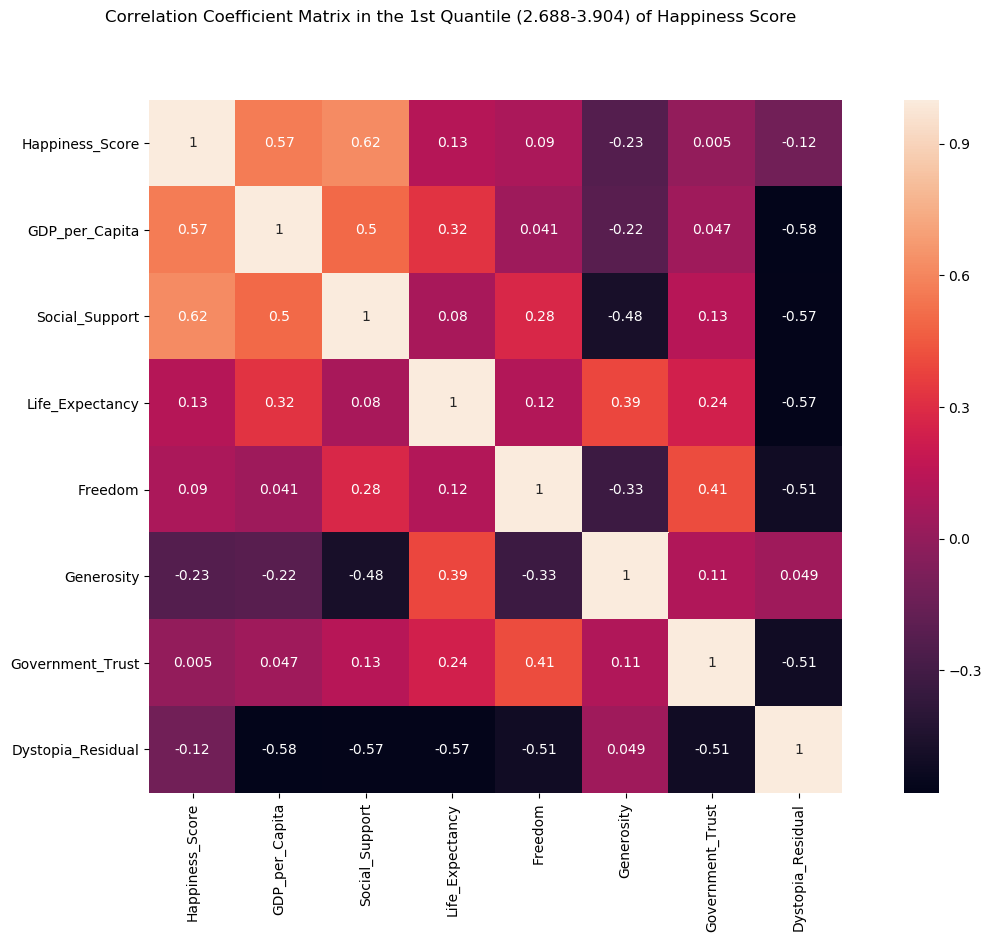

In [172]:
corr= q1_data_2017.iloc[:,3:11].corr()


plt.subplots(figsize=(16, 9))

sns.heatmap(corr, square=True, annot=True)
plt.suptitle('Correlation Coefficient Matrix in the 1st Quantile (2.688-3.904) of Happiness Score')

For the group of country that have the lowest score, which are countries that have happiness score between 2.688 and 3.904, life expectancy does not seem to have a higher relationship to overall happiness score like it was in the whole dataset heatmap. GDP per capita and social support are still having high correlation. Unlike the overall heatmap above, social support is a bit higher than GDP.

Text(0.5, 0.98, 'Correlation Coefficient Matrix in the 2nd Quantile (3.904-5.115) of Happiness Score')

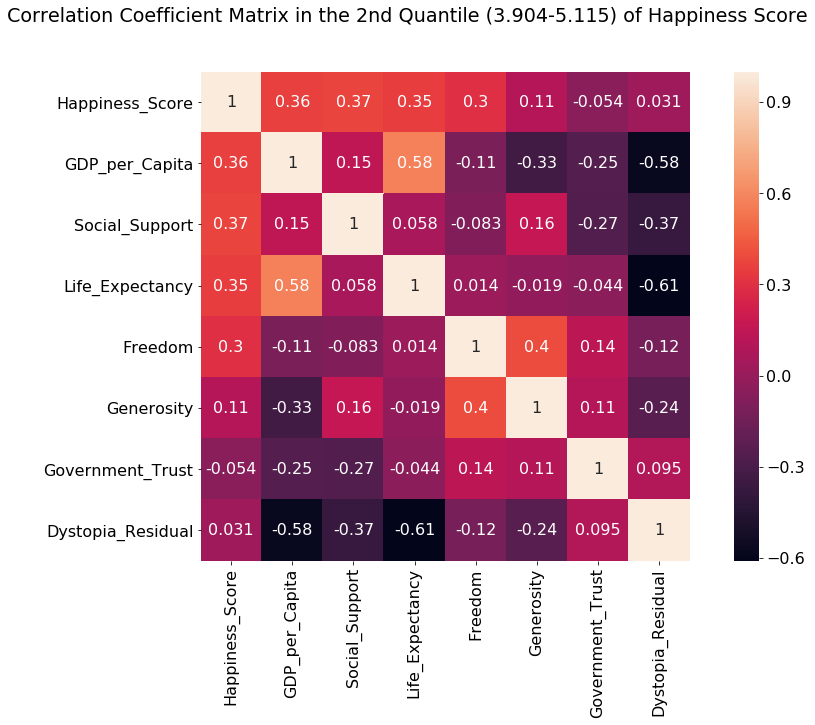

In [186]:
corr= q2_data_2017.iloc[:,3:11].corr()


plt.subplots(figsize=(16, 9))

sns.heatmap(corr, square=True, annot=True)
plt.suptitle('Correlation Coefficient Matrix in the 2nd Quantile (3.904-5.115) of Happiness Score')

When it get to the second quantile group, which are countries with Happiness Score between 3.904 and 5.115, suddenly the correlation of GDP per Capita, Social Support, Life Expectancy, and Freedom to happiness score are about the same amount. 

Text(0.5, 0.98, 'Correlation Coefficient Matrix in the 3rd Quantile (5.155-6.326) of Happiness Score')

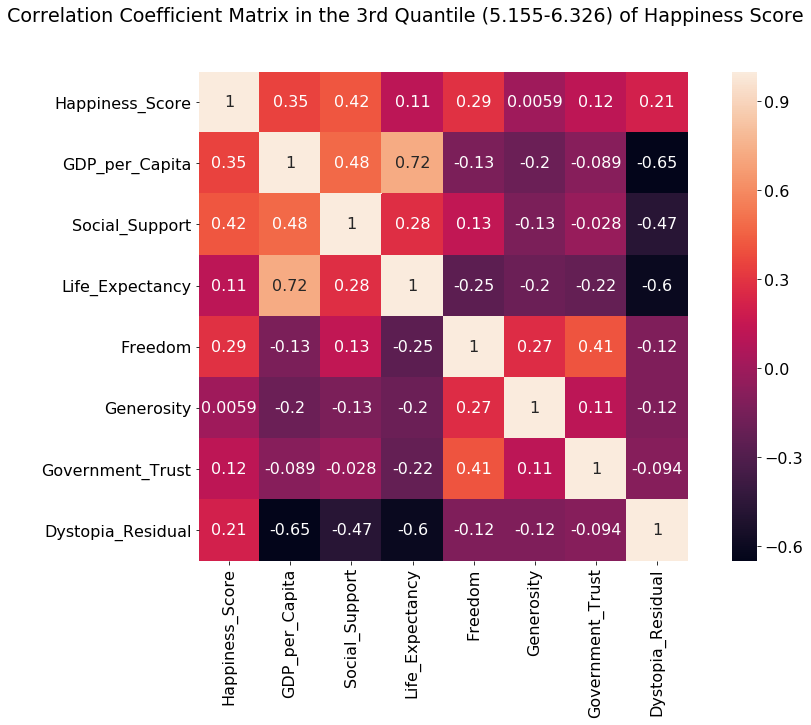

In [187]:
corr= q3_data_2017.iloc[:,3:11].corr()


plt.subplots(figsize=(16, 9))

sns.heatmap(corr, square=True, annot=True)
plt.suptitle('Correlation Coefficient Matrix in the 3rd Quantile (5.155-6.326) of Happiness Score')

For countries with happiness score in the third quantiles, which are countries with Happiness Score between 5.155 and 6.326, GDP per capita does not seem to have high impact on the overall happiness score anymore. Also, Life Expectancy is no longer as important as it was comparing to the countries in the 2nd quantile. Freedom, however, has a very strong correlation to the overall happiness score. Social support is still consistently having a high correlation. 

Text(0.5, 0.98, 'Correlation Coefficient Matrix for Countries in Quantile 4 of Happiness Score')

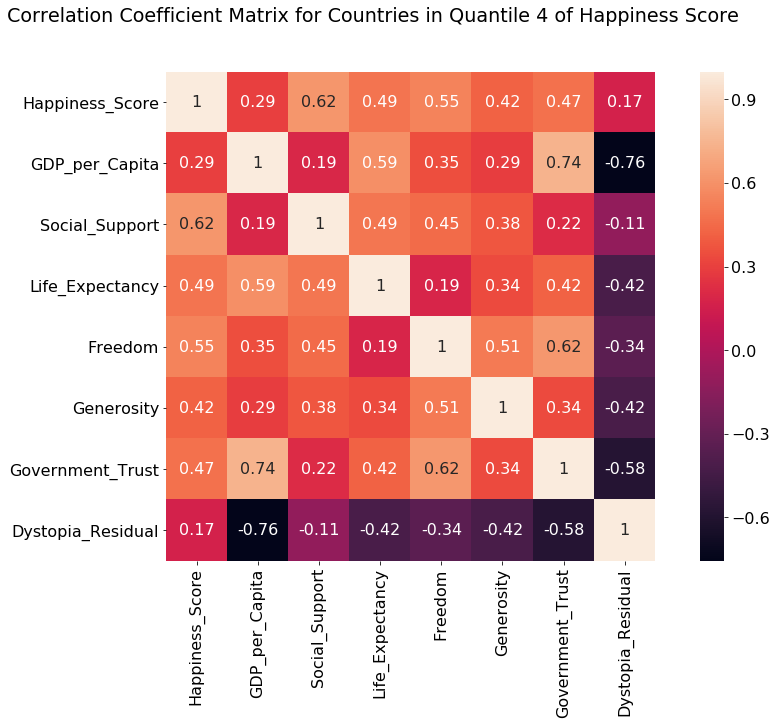

In [188]:
corr= q4_data_2017.iloc[:,3:11].corr()


plt.subplots(figsize=(16, 9))

sns.heatmap(corr, square=True, annot=True)
plt.suptitle('Correlation Coefficient Matrix for Countries in Quantile 4 of Happiness Score')

In [189]:
pd.cut(data_2017_tidy['Happiness_Score'],2)

0      (5.115, 7.537]
1      (5.115, 7.537]
2      (5.115, 7.537]
3      (5.115, 7.537]
4      (5.115, 7.537]
5      (5.115, 7.537]
6      (5.115, 7.537]
7      (5.115, 7.537]
8      (5.115, 7.537]
9      (5.115, 7.537]
10     (5.115, 7.537]
11     (5.115, 7.537]
12     (5.115, 7.537]
13     (5.115, 7.537]
14     (5.115, 7.537]
15     (5.115, 7.537]
16     (5.115, 7.537]
17     (5.115, 7.537]
18     (5.115, 7.537]
19     (5.115, 7.537]
20     (5.115, 7.537]
21     (5.115, 7.537]
22     (5.115, 7.537]
23     (5.115, 7.537]
24     (5.115, 7.537]
25     (5.115, 7.537]
26     (5.115, 7.537]
27     (5.115, 7.537]
28     (5.115, 7.537]
29     (5.115, 7.537]
            ...      
125    (2.688, 5.115]
126    (2.688, 5.115]
127    (2.688, 5.115]
128    (2.688, 5.115]
129    (2.688, 5.115]
130    (2.688, 5.115]
131    (2.688, 5.115]
132    (2.688, 5.115]
133    (2.688, 5.115]
134    (2.688, 5.115]
135    (2.688, 5.115]
136    (2.688, 5.115]
137    (2.688, 5.115]
138    (2.688, 5.115]
139    (2.

In [97]:
first_half_data_2017=data_2017_tidy.loc[(data_2017_tidy['Happiness_Score'] >= 2.688) & (data_2017_tidy['Happiness_Score'] < 5.155) ]
first_half_data_2017.count()

Country              63
Region               60
Happiness_Rank       63
Happiness_Score      63
GDP_per_Capita       63
Social_Support       63
Life_Expectancy      63
Freedom              63
Generosity           63
Government_Trust     63
Dystopia_Residual    63
dtype: int64

In [99]:
second_half_data_2017=data_2017_tidy.loc[(data_2017_tidy['Happiness_Score'] >= 5.155) & (data_2017_tidy['Happiness_Score'] <7.537) ]
second_half_data_2017.count()

Country              91
Region               89
Happiness_Rank       91
Happiness_Score      91
GDP_per_Capita       91
Social_Support       91
Life_Expectancy      91
Freedom              91
Generosity           91
Government_Trust     91
Dystopia_Residual    91
dtype: int64

Text(0.5, 0.98, 'Correlation Coefficient Matrix for Countries Below Median of Happiness Score')

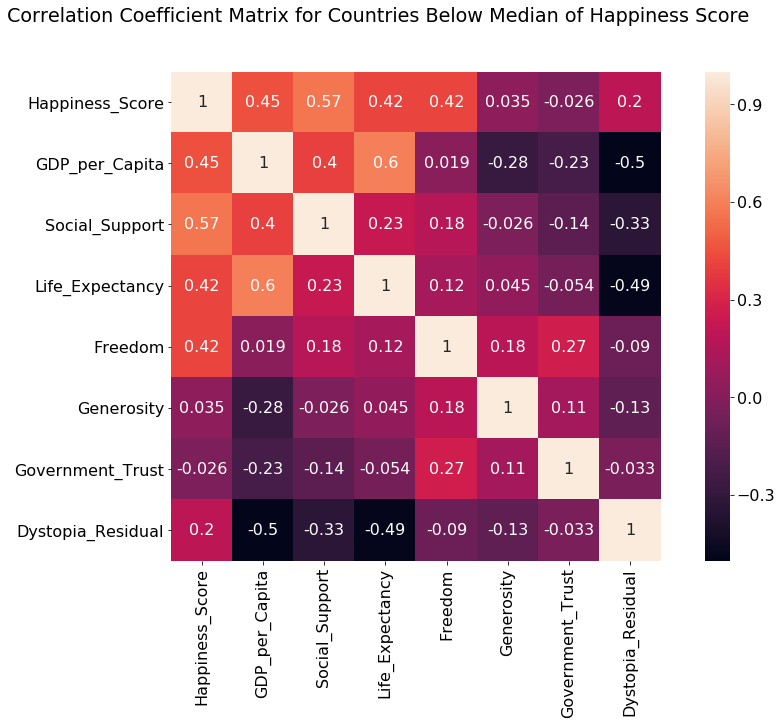

In [106]:
corr= first_half_data_2017.iloc[:,3:11].corr()


plt.subplots(figsize=(16, 9))

sns.heatmap(corr, square=True, annot=True)
plt.suptitle('Correlation Coefficient Matrix for Countries Below Median of Happiness Score')

Text(0.5, 0.98, 'Correlation Coefficient Matrix for Countries Above Median of Happiness Score')

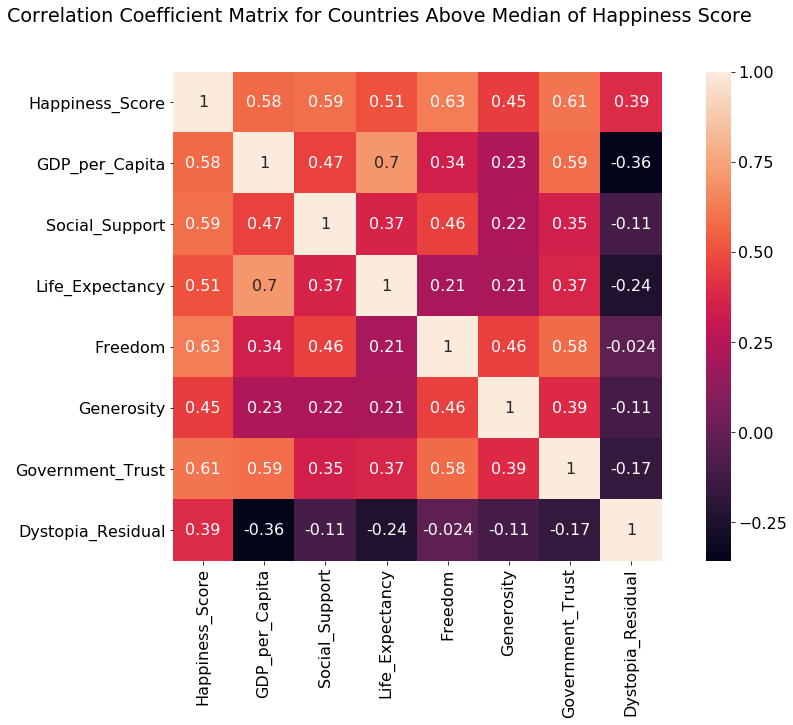

In [107]:
corr= second_half_data_2017.iloc[:,3:11].corr()


plt.subplots(figsize=(16, 9))

sns.heatmap(corr, square=True, annot=True)
plt.suptitle('Correlation Coefficient Matrix for Countries Above Median of Happiness Score')

So there a lot of findings, some factors change dramatically between different quantiles and it would be beneficial to be able to graph the scatterplot for each variable pairs to do more further analysis but that would be work for the future.